In [1]:
from time import time
t00 = time()
import numpy as np

In [2]:
# Load dataset
X_fn = './data/X_test.npy'
y_fn = './data/y_test.npy'
X = np.load(X_fn)
y = np.load(y_fn)
print(X.shape, y.shape)
unique, counts = np.unique(y, return_counts=True)
print("Unique labels:", unique)
print("Counts per label:", counts)

(3000, 1000) (3000,)
Unique labels: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
Counts per label: [100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100]


In [3]:
from resnet import ResNet
import os
import torch

In [4]:
# CNN parameters
layers = 6
hidden_size = 100
block_size = 2
hidden_sizes = [hidden_size] * layers
num_blocks = [block_size] * layers
input_dim = 1000
in_channels = 64
n_classes = 30
os.environ['CUDA_VISIBLE_DEVICES'] = '{}'.format(0)
cuda = torch.cuda.is_available()

In [5]:
# Load trained weights
cnn = ResNet(hidden_sizes, num_blocks, input_dim,
            in_channels=in_channels, n_classes=n_classes)

if cuda: cnn.cuda()
cnn.load_state_dict(torch.load(
    './best_model.pth', map_location=lambda storage, loc: storage))

<All keys matched successfully>

In [6]:
from training import get_predictions
from datasets import spectral_dataloader

In [7]:
# Make predictions on subset of data
t0 = time()
dl = spectral_dataloader(X, y, batch_size=10, shuffle=False)
y_hat = get_predictions(cnn, dl, cuda)
print('Predicted {} spectra: {:0.2f}s'.format(len(y_hat), time()-t0))

Predicted 3000 spectra: 50.15s


In [8]:
# Computing accuracy
acc = (y_hat == y).mean()
print('Accuracy: {:0.1f}%'.format(100*acc))

Accuracy: 54.9%


In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from config import ORDER, STRAINS
%matplotlib inline

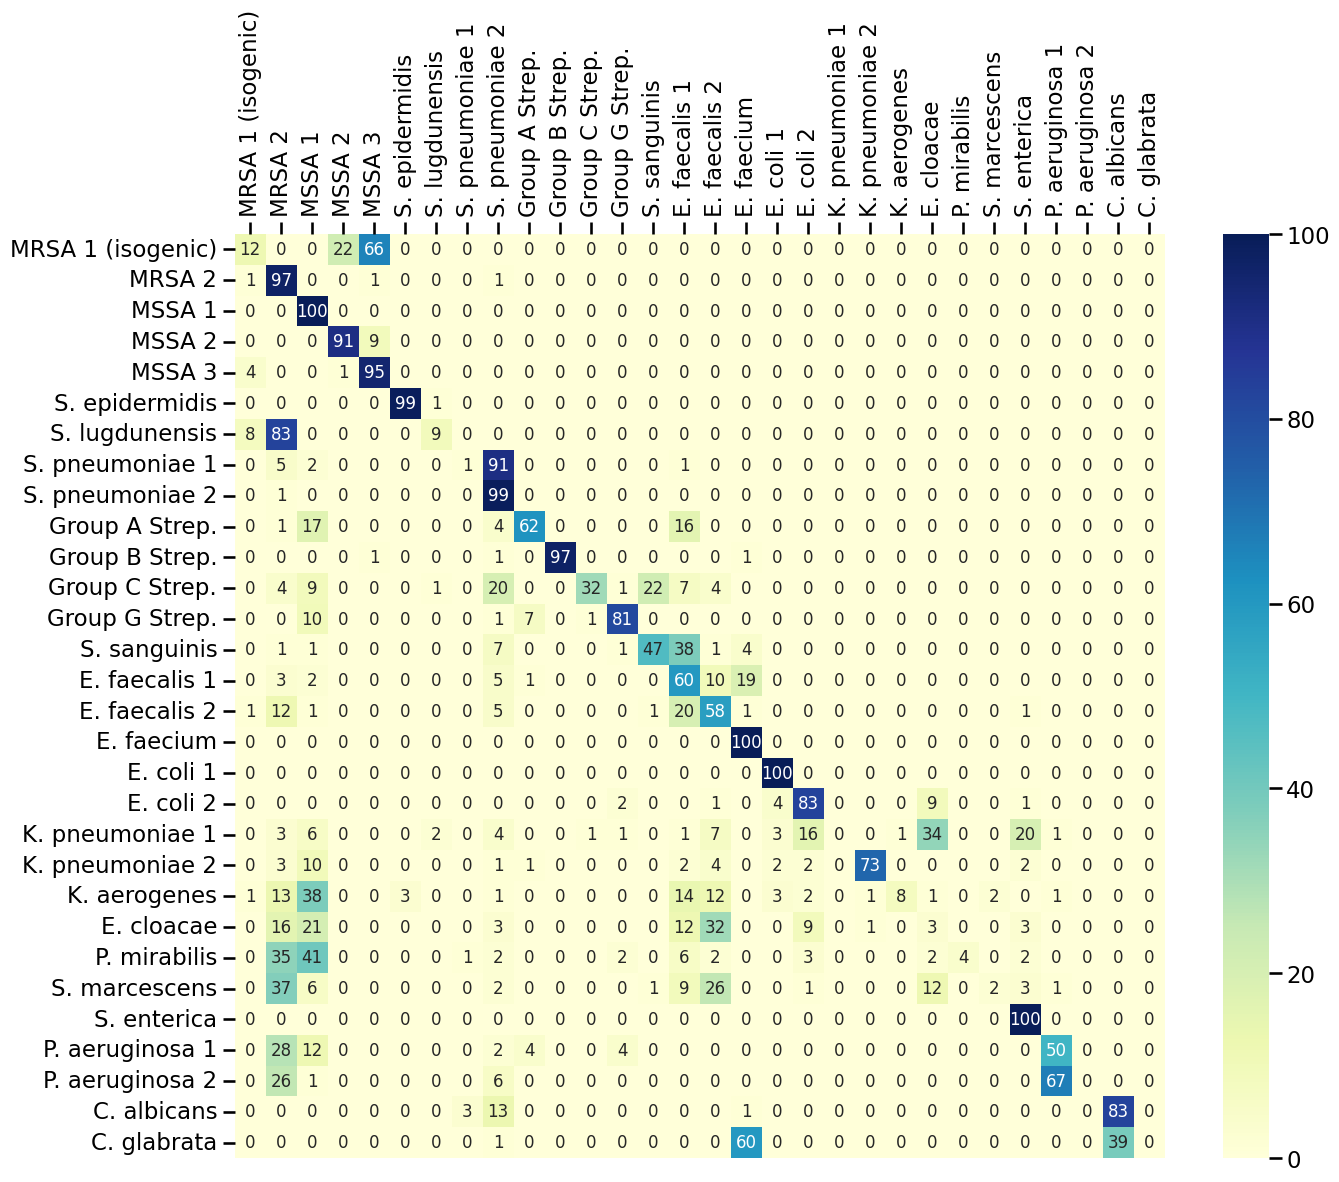

In [10]:
# Plot confusion matrix
sns.set_context("talk", rc={"font":"Helvetica", "font.size":12})
label = [STRAINS[i] for i in ORDER]
cm = confusion_matrix(y, y_hat, labels=ORDER)
plt.figure(figsize=(15, 12))
cm = 100 * cm / cm.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f',
                 xticklabels=label, yticklabels=label)
ax.xaxis.tick_top()
plt.xticks(rotation=90) 
plt.show()

In [12]:
X_fn2 = './data/X_2018clinical.npy'
y_fn2 = './data/y_2018clinical.npy'
X2 = np.load(X_fn2)
y2 = np.load(y_fn2)
print(X2.shape, y2.shape)

(10000, 1000) (10000,)


In [13]:
# Make predictions on subset of data
t0 = time()
dl = spectral_dataloader(X2, y2, batch_size=10, shuffle=False)
y_hat = get_predictions(cnn, dl, cuda)
print('Predicted {} spectra: {:0.2f}s'.format(len(y_hat), time()-t0))

Predicted 10000 spectra: 103.20s


In [15]:
# Computing accuracy
acc = (y_hat == y2).mean()
print('Accuracy: {:0.1f}%'.format(100*acc))

Accuracy: 0.9%
